In [ ]:
import sys
import pandas as pd
import numpy as np
import sklearn
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [ ]:
cleveland = pd.read_csv('cleveland.csv')

In [ ]:
print ('format(cleveland.shape')
print (cleveland.loc[1])

format(cleveland.shape
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [ ]:
cleveland.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [ ]:
data = cleveland[~cleveland.isin(['?'])]
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [ ]:
data = data.dropna(axis=0)
data.loc[280:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0


In [ ]:
print (data.shape)
print (data.dtypes)

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
print(data.head())
data.dtypes

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


,0
age,int64
sex,int64
cp,int64
trestbps,int64
chol,int64
fbs,int64
restecg,int64
thalach,int64
exang,int64
oldpeak,float64


In [ ]:
# print data characteristics, usings pandas built-in describe() function
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


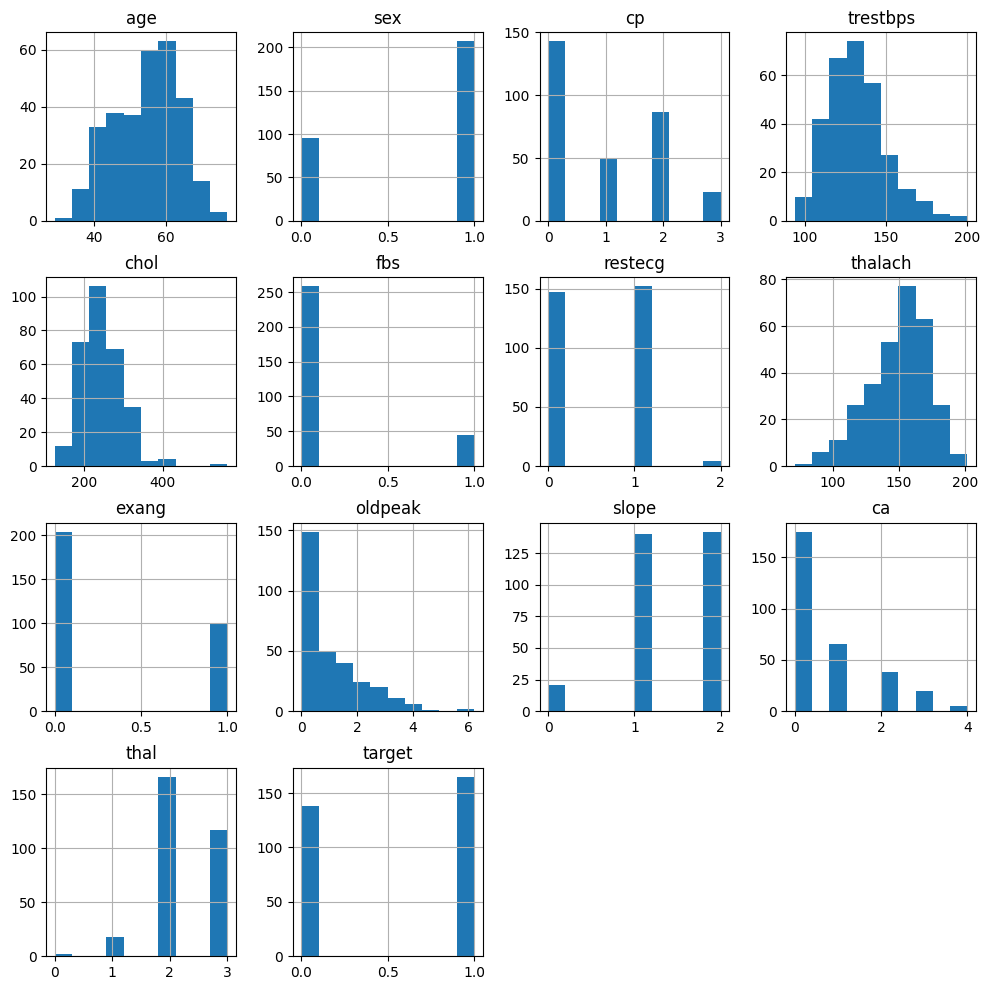

In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data = data.dropna()

# Plot histograms for numerical columns
data.hist(figsize=(12, 12))
plt.show()

In [ ]:
from sklearn import model_selection

X = data.drop(['sex'], axis=1)
y = data['sex']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X)

     age  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0     63   3       145   233    1        0      150      0      2.3      0   
1     37   2       130   250    0        1      187      0      3.5      0   
2     41   1       130   204    0        0      172      0      1.4      2   
3     56   1       120   236    0        1      178      0      0.8      2   
4     57   0       120   354    0        1      163      1      0.6      2   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
298   57   0       140   241    0        1      123      1      0.2      1   
299   45   3       110   264    0        1      132      0      1.2      1   
300   68   0       144   193    1        1      141      0      3.4      1   
301   57   0       130   131    0        1      115      1      1.2      1   
302   57   1       130   236    0        0      174      0      0.0      1   

     ca  thal  target  
0     0     1       1  
1     0     2  

In [ ]:
print(y)

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:


# Example model creation function
def create_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(5, activation='softmax'))  # Assuming you have 5 classes (for one-hot encoding)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = create_model()

# Model summary
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,141 (12.27 KB)

 Trainable params: 3,141 (12.27 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary[:20])

43     0
156    1
44     1
168    1
97     1
215    0
201    1
153    0
278    0
155    0
55     1
26     1
138    1
139    1
264    1
95     1
160    1
171    1
238    1
124    0
Name: sex, dtype: int64


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the Cleveland Heart Disease dataset (assuming 'cleveland.csv' is in the same directory)
cleveland = pd.read_csv('train.csv')

# Replace '?' and '-9' with NaN
cleveland.replace(['?', '-9'], np.nan, inplace=True)

# Convert columns to numeric where possible, force errors to NaN
cleveland= cleveland.apply(pd.to_numeric, errors='coerce')

# Handle missing values: Fill numeric columns with mean
cleveland.fillna(cleveland.mean(), inplace=True)

# Fill categorical columns with mode if they exist
categorical_columns = cleveland.select_dtypes(include=['object']).columns
for col in categorical_columns:
    cleveland[col].fillnacleveland[col].mode().iloc[0], inplace=True

# Encoding categorical variables (if any)
encoder = LabelEncoder()
for col in categorical_columns:
    cleveland[col] = encoder.fit_transform(cleveland[col])

# Feature selection: Let's assume 'target' is the column indicating if the patient has heart disease
X = cleveland.drop(columns=['sex'], axis=1)
Y = cleveland['sex']

# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Modeling with Gaussian Naive Bayes
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, Y_train)

# Predictions
train_predictions_nb = naive_bayes_classifier.predict(X_train)
test_predictions_nb = naive_bayes_classifier.predict(X_test)

# Evaluation for Gaussian Naive Bayes
accuracy_nb = accuracy_score(Y_test, test_predictions_nb)
precision_nb = precision_score(Y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(Y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(Y_test, test_predictions_nb, average='weighted')

# Confusion Matrix
conf_matrix_nb = confusion_matrix(Y_test, test_predictions_nb)

# Printing the metrics for Gaussian Naive Bayes
print("\nGaussian Naive Bayes Metrics:")
print("Accuracy: {:.2f}%".format(accuracy_nb * 100))
print("Precision: {:.2f}".format(precision_nb))
print("Recall: {:.2f}".format(recall_nb))
print("F1-score: {:.2f}".format(f1_nb))

# Printing the Confusion Matrix for Gaussian Naive Bayes
print("\nConfusion Matrix:")
print(conf_matrix_nb)



Gaussian Naive Bayes Metrics:
Accuracy: 75.61%
Precision: 0.78
Recall: 0.76
F1-score: 0.76

Confusion Matrix:
[[ 34  18]
 [ 32 121]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import tree

# Load the Cleveland Heart Disease dataset
cleveland = pd.read_csv('train.csv')

# Replace '?' and '-9' with NaN
cleveland.replace(['?', '-9'], np.nan, inplace=True)

# Convert columns to numeric where possible, force errors to NaN
cleveland = cleveland.apply(pd.to_numeric, errors='coerce')

# Handle missing values: Fill numeric columns with mean
cleveland.fillna(cleveland.mean(), inplace=True)

# Fill categorical columns with mode if they exist
categorical_columns = cleveland.select_dtypes(include=['object']).columns
for col in categorical_columns:
    cleveland[col].fillna(cleveland[col].mode().iloc[0], inplace=True)

# Encoding categorical variables (if any)
encoder = LabelEncoder()
for col in categorical_columns:
    cleveland[col] = encoder.fit_transform(cleveland[col])

# Feature selection: Let's assume 'target' is the column indicating if the patient has heart disease
X = cleveland.drop(columns=['sex'], axis=1)  # Replace 'sex' with the actual target column if different
Y = cleveland['sex']

# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Modeling with Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, Y_train)

# Predictions
train_predictions_dt = decision_tree_classifier.predict(X_train)
test_predictions_dt = decision_tree_classifier.predict(X_test)

# Evaluation for Decision Tree
accuracy_dt = accuracy_score(Y_test, test_predictions_dt)
precision_dt = precision_score(Y_test, test_predictions_dt, average='weighted')
recall_dt = recall_score(Y_test, test_predictions_dt, average='weighted')
f1_dt = f1_score(Y_test, test_predictions_dt, average='weighted')

# Confusion Matrix
conf_matrix_dt = confusion_matrix(Y_test, test_predictions_dt)

# Printing the metrics for Decision Tree
print("\nDecision Tree Metrics:")
print("Accuracy: {:.2f}%".format(accuracy_dt * 100))
print("Precision: {:.2f}".format(precision_dt))
print("Recall: {:.2f}".format(recall_dt))
print("F1-score: {:.2f}".format(f1_dt))

# Printing the Confusion Matrix for Decision Tree
print("\nConfusion Matrix:")
print(conf_matrix_dt)


Decision Tree Metrics:
Accuracy: 98.54%
Precision: 0.99
Recall: 0.99
F1-score: 0.99

Confusion Matrix:
[[ 49   3]
 [  0 153]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the Cleveland Heart Disease dataset
cleveland = pd.read_csv('train.csv')

# Replace '?' and '-9' with NaN
cleveland.replace(['?', '-9'], np.nan, inplace=True)

# Convert columns to numeric where possible, force errors to NaN
cleveland = cleveland.apply(pd.to_numeric, errors='coerce')

# Handle missing values: Fill numeric columns with mean
cleveland.fillna(cleveland.mean(), inplace=True)

# Fill categorical columns with mode if they exist
categorical_columns = cleveland.select_dtypes(include=['object']).columns
for col in categorical_columns:
    cleveland[col].fillna(cleveland[col].mode().iloc[0], inplace=True)

# Encoding categorical variables (if any)
encoder = LabelEncoder()
for col in categorical_columns:
    cleveland[col] = encoder.fit_transform(cleveland[col])

# Feature selection: Let's assume 'target' is the column indicating if the patient has heart disease
X = cleveland.drop(columns=['sex'], axis=1)  # Replace 'sex' with the actual target column if different
Y = cleveland['sex']

# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Standardize the features for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling with K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_classifier.fit(X_train, Y_train)

# Predictions
train_predictions_knn = knn_classifier.predict(X_train)
test_predictions_knn = knn_classifier.predict(X_test)

# Evaluation for KNN
accuracy_knn = accuracy_score(Y_test, test_predictions_knn)
precision_knn = precision_score(Y_test, test_predictions_knn, average='weighted')
recall_knn = recall_score(Y_test, test_predictions_knn, average='weighted')
f1_knn = f1_score(Y_test, test_predictions_knn, average='weighted')

# Confusion Matrix
conf_matrix_knn = confusion_matrix(Y_test, test_predictions_knn)

# Printing the metrics for KNN
print("\nK-Nearest Neighbors (KNN) Metrics:")
print("Accuracy: {:.2f}%".format(accuracy_knn * 100))
print("Precision: {:.2f}".format(precision_knn))
print("Recall: {:.2f}".format(recall_knn))
print("F1-score: {:.2f}".format(f1_knn))

# Printing the Confusion Matrix for KNN
print("\nConfusion Matrix:")
print(conf_matrix_knn)



K-Nearest Neighbors (KNN) Metrics:
Accuracy: 79.02%
Precision: 0.80
Recall: 0.79
F1-score: 0.79

Confusion Matrix:
[[ 34  18]
 [ 25 128]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the Cleveland Heart Disease dataset
cleveland = pd.read_csv('train.csv')

# Replace '?' and '-9' with NaN
cleveland.replace(['?', '-9'], np.nan, inplace=True)

# Convert columns to numeric where possible, force errors to NaN
cleveland = cleveland.apply(pd.to_numeric, errors='coerce')

# Handle missing values: Fill numeric columns with mean
cleveland.fillna(cleveland.mean(), inplace=True)

# Fill categorical columns with mode if they exist
categorical_columns = cleveland.select_dtypes(include=['object']).columns
for col in categorical_columns:
    cleveland[col].fillna(cleveland[col].mode().iloc[0], inplace=True)

# Encoding categorical variables (if any)
encoder = LabelEncoder()
for col in categorical_columns:
    cleveland[col] = encoder.fit_transform(cleveland[col])

# Feature selection: Let's assume 'target' is the column indicating if the patient has heart disease
X = cleveland.drop(columns=['sex'], axis=1)  # Replace 'sex' with the actual target column if different
Y = cleveland['sex']

# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Modeling with Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train, Y_train)

# Predictions
train_predictions_rf = random_forest_classifier.predict(X_train)
test_predictions_rf = random_forest_classifier.predict(X_test)

# Evaluation for Random Forest
accuracy_rf = accuracy_score(Y_test, test_predictions_rf)
precision_rf = precision_score(Y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(Y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(Y_test, test_predictions_rf, average='weighted')

# Confusion Matrix
conf_matrix_rf = confusion_matrix(Y_test, test_predictions_rf)

# Printing the metrics for Random Forest
print("\nRandom Forest Metrics:")
print("Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Precision: {:.2f}".format(precision_rf))
print("Recall: {:.2f}".format(recall_rf))
print("F1-score: {:.2f}".format(f1_rf))

# Printing the Confusion Matrix for Random Forest
print("\nConfusion Matrix:")
print(conf_matrix_rf)

# Feature Importance
feature_importance = random_forest_classifier.feature_importances_
features = X.columns
print("\nFeature Importances:")
for feature, importance in zip(features, feature_importance):
    print(f"{feature}: {importance:.4f}")



Random Forest Metrics:
Accuracy: 98.54%
Precision: 0.99
Recall: 0.99
F1-score: 0.99

Confusion Matrix:
[[ 49   3]
 [  0 153]]

Feature Importances:
age: 0.1192
cp: 0.0378
trestbps: 0.1242
chol: 0.1600
fbs: 0.0171
restecg: 0.0386
thalach: 0.1395
exang: 0.0217
oldpeak: 0.0943
slope: 0.0446
ca: 0.0435
thal: 0.1014
target: 0.0581


In [ ]:
cleveland = pd.read_csv('Book1.csv')

# Print the first few rows of the DataFrame to verify the contents
print(cleveland.head())

   alg  accuracy  precision  recall  f1-score
0   NB     75.61       0.78    0.76      0.76
1   DT     97.07       0.97    0.97      0.97
2  KNN     80.00       0.82    0.80      0.81
3   RF     98.54       0.99    0.99      0.99


In [ ]:
import seaborn as sns
sns.set()

Index(['alg', 'accuracy', 'precision', 'recall', 'f1-score'], dtype='object')
   alg  accuracy  precision  recall  f1-score
0   NB     75.61       0.78    0.76      0.76
1   DT     97.07       0.97    0.97      0.97
2  KNN     80.00       0.82    0.80      0.81
3   RF     98.54       0.99    0.99      0.99


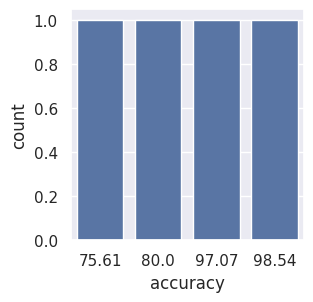

In [ ]:
# Load the CSV file into a DataFrame
heart_data = pd.read_csv('Book1.csv')

# Verify the DataFrame contents
print(heart_data.columns)
print(heart_data.head())

# If the correct column name is 'Category', proceed with plotting
plt.figure(figsize=(3,3))
sns.countplot(x='accuracy', data=heart_data)
plt.show()


Index(['alg', 'accuracy', 'precision', 'recall', 'f1-score'], dtype='object')
   alg  accuracy  precision  recall  f1-score
0   NB     75.61       0.78    0.76      0.76
1   DT     97.07       0.97    0.97      0.97
2  KNN     80.00       0.82    0.80      0.81
3   RF     98.54       0.99    0.99      0.99


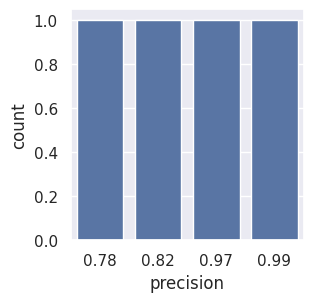

In [ ]:
# Load the CSV file into a DataFrame
cleveland = pd.read_csv('Book1.csv')

# Verify the DataFrame contents
print(heart_data.columns)
print(heart_data.head())

# If the correct column name is 'Category', proceed with plotting
plt.figure(figsize=(3,3))
sns.countplot(x='precision', data=heart_data)
plt.show()


Index(['alg', 'accuracy', 'precision', 'recall', 'f1-score'], dtype='object')
   alg  accuracy  precision  recall  f1-score
0   NB     75.61       0.78    0.76      0.76
1   DT     97.07       0.97    0.97      0.97
2  KNN     80.00       0.82    0.80      0.81
3   RF     98.54       0.99    0.99      0.99


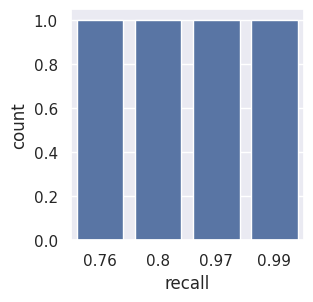

In [ ]:
# Load the CSV file into a DataFrame
heart_data = pd.read_csv('Book1.csv')

# Verify the DataFrame contents
print(heart_data.columns)
print(heart_data.head())

# If the correct column name is 'Category', proceed with plotting
plt.figure(figsize=(3,3))
sns.countplot(x='recall', data=heart_data)
plt.show()


Index(['alg', 'accuracy', 'precision', 'recall', 'f1-score'], dtype='object')
   alg  accuracy  precision  recall  f1-score
0   NB     75.61       0.78    0.76      0.76
1   DT     97.07       0.97    0.97      0.97
2  KNN     80.00       0.82    0.80      0.81
3   RF     98.54       0.99    0.99      0.99


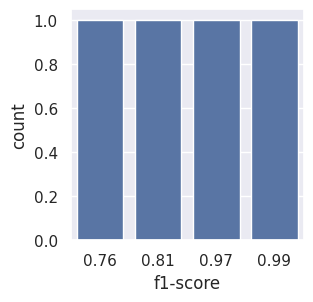

In [ ]:
# Load the CSV file into a DataFrame
cleveland = pd.read_csv('Book1.csv')

# Verify the DataFrame contents
print(heart_data.columns)
print(heart_data.head())

# If the correct column name is 'Category', proceed with plotting
plt.figure(figsize=(3,3))
sns.countplot(x='f1-score', data=heart_data)
plt.show()


In [ ]:
categorical_pred = model.predict(X_test)  # Replace with actual prediction logic
print("Length of y_test:", len(y_test))
print("Length of categorical_pred:", len(categorical_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Length of y_test: 61
Length of categorical_pred: 205


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
categorical_pred = model.predict(X_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(Y_test, categorical_pred))
print(classification_report(Y_test, categorical_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Results for Categorical Model
0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      52.0
           1       0.00      0.00      0.00     153.0
           2       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0

    accuracy                           0.00     205.0
   macro avg       0.00      0.00      0.00     205.0
weighted avg       0.00      0.00      0.00     205.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

0 means no heart disease, 1 means have heart disease
Predicted: 0, Actual: 0  # Correct
Predicted: 1, Actual: 1  # Correct
Predicted: 0, Actual: 0  # Correct
Predicted: 1, Actual: 0  # Incorrect
Predicted: 0, Actual: 1  # Incorrect

In [ ]:
if (categorical_pred[5] == 0):
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')

The Person has Heart Disease


In [ ]:
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X, Y)


RandomForestClassifier(random_state=42)

In [ ]:
import joblib

# Save the model to a file
joblib.dump(final_model, 'heart_disease_model.pkl')

# Load the model when needed
loaded_model = joblib.load('heart_disease_model.pkl')


In [ ]:
sample_data = np.array([[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]])  # Replace with appropriate values
prediction = loaded_model.predict(sample_data)
print("Prediction:", prediction)


Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the Cleveland dataset
cleveland = pd.read_csv('cleveland.csv', header=None)

# Rename columns based on the dataset documentation
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
cleveland.columns = columns

# Replace missing values represented as '?' with NaN
cleveland.replace('?', np.nan, inplace=True)

# Convert columns to numeric and fill missing values
cleveland = cleveland.apply(pd.to_numeric, errors='coerce')
cleveland.fillna(cleveland.mean(), inplace=True)

# Features and target variable
X = cleveland.drop(columns=['target'])
y = cleveland['target'].apply(lambda x: 1 if x > 0 else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'heart_disease_model.pkl')
print("Model saved as 'heart_disease_model.pkl'")


Model saved as 'heart_disease_model.pkl'


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
cleveland = pd.read_csv('cleveland.csv', header=None)
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
cleveland.columns = columns
cleveland.replace('?', np.nan, inplace=True)
cleveland = cleveland.apply(pd.to_numeric, errors='coerce')
cleveland.fillna(cleveland.mean(), inplace=True)

# Features and target
X = cleveland.drop(columns=['target'])
y = cleveland['target'].apply(lambda x: 1 if x > 0 else 0)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 1: Cluster the training data into regions
n_clusters = 5  # You can experiment with different values
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
train_clusters = kmeans.fit_predict(X_train)

# Step 2: Train a classifier for each cluster
region_models = {}
for cluster in range(n_clusters):
    # Get data points belonging to this cluster
    cluster_indices = train_clusters == cluster
    X_cluster = X_train[cluster_indices]
    y_cluster = y_train[cluster_indices]

    # Train a Logistic Regression model for this cluster
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_cluster, y_cluster)
    region_models[cluster] = model

# Step 3: Assign test points to regions and predict
test_clusters = kmeans.predict(X_test)
predictions = []

for i, cluster in enumerate(test_clusters):
    # Use the model for the corresponding cluster
    model = region_models[cluster]
    pred = model.predict([X_test[i]])[0]
    predictions.append(pred)

# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"PRC Accuracy: {accuracy:.2f}")


PRC Accuracy: 0.82
